In [2]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [8]:
files_to_ignore = ['.DS_Store']
script_1_path = '../../model_results/related_work_arch/'
script_1_folders = os.listdir(script_1_path)
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['final_merged_results', 'realted_work_arch_maia_stiber_2023-09-26_23-08-44']

In [9]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}results_related_work_gridSearch_results.csv')
df

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
0,0,1,0,128,0.0,sigmoid,categorical_crossentropy,SGD,500,2048,...,0.5806,"{0: 0.58, 1: 0.49, 2: 0.0}","{0: 1.0, 1: 0.03, 2: 0.0}","{0: 0.74, 1: 0.06, 2: 0.0}","{'precision': 0.36, 'recall': 0.34, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
1,0,2,0,128,0.0,sigmoid,categorical_crossentropy,SGD,500,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
2,0,3,0,128,0.0,sigmoid,categorical_crossentropy,SGD,1000,2048,...,0.5448,"{0: 0.6, 1: 0.36, 2: 0.0}","{0: 0.8, 1: 0.33, 2: 0.0}","{0: 0.69, 1: 0.35, 2: 0.0}","{'precision': 0.32, 'recall': 0.38, 'f1_score'...","{'precision': 0.44, 'recall': 0.54, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
3,0,4,0,128,0.0,sigmoid,categorical_crossentropy,SGD,1000,4096,...,0.5865,"{0: 0.59, 1: 0.51, 2: 0.0}","{0: 0.99, 1: 0.07, 2: 0.0}","{0: 0.74, 1: 0.12, 2: 0.0}","{'precision': 0.37, 'recall': 0.35, 'f1_score'...","{'precision': 0.47, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
4,0,5,0,128,0.0,sigmoid,categorical_crossentropy,Adam,500,2048,...,0.3140,"{0: 0.56, 1: 0.27, 2: 0.14}","{0: 0.28, 1: 0.44, 2: 0.25}","{0: 0.37, 1: 0.33, 2: 0.18}","{'precision': 0.32, 'recall': 0.32, 'f1_score'...","{'precision': 0.42, 'recall': 0.31, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0,284,0,128,0.6,softmax,hinge,SGD,1000,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_softmax_hinge_SGD_1000_40...
284,0,285,0,128,0.6,softmax,hinge,Adam,500,2048,...,0.4549,"{0: 0.59, 1: 0.31, 2: 0.0}","{0: 0.53, 1: 0.58, 2: 0.0}","{0: 0.56, 1: 0.41, 2: 0.0}","{'precision': 0.3, 'recall': 0.37, 'f1_score':...","{'precision': 0.42, 'recall': 0.45, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_softmax_hinge_Adam_500_20...
285,0,286,0,128,0.6,softmax,hinge,Adam,500,4096,...,0.4655,"{0: 0.59, 1: 0.31, 2: 0.0}","{0: 0.57, 1: 0.53, 2: 0.0}","{0: 0.58, 1: 0.39, 2: 0.0}","{'precision': 0.3, 'recall': 0.36, 'f1_score':...","{'precision': 0.42, 'recall': 0.47, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_softmax_hinge_Adam_500_40...
286,0,287,0,128,0.6,softmax,hinge,Adam,1000,2048,...,0.4410,"{0: 0.59, 1: 0.3, 2: 0.0}","{0: 0.49, 1: 0.61, 2: 0.0}","{0: 0.54, 1: 

In [6]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [10]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [11]:
top_n_model_test_accuracy_indexes

Index([  3, 251,   0, 257, 249,   1,   8,   9,  10,  11,  16,  17,  18,  19,
        20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  48,  49,
        50,  51,  56,  57,  58,  59,  64,  65,  66,  67,  72,  73,  74,  75,
        80,  81,  82,  83,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 120, 121, 122, 123, 128, 129, 130, 131,
       136, 137, 138, 139, 144, 145, 146, 147, 152, 153, 154, 155, 160, 161,
       162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 192],
      dtype='int64')

In [12]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
3,0,4,0,128,0.0,sigmoid,categorical_crossentropy,SGD,1000,4096,...,0.5865,"{0: 0.59, 1: 0.51, 2: 0.0}","{0: 0.99, 1: 0.07, 2: 0.0}","{0: 0.74, 1: 0.12, 2: 0.0}","{'precision': 0.37, 'recall': 0.35, 'f1_score'...","{'precision': 0.47, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
251,0,252,0,128,0.6,relu,binary_crossentropy,SGD,1000,4096,...,0.5845,"{0: 0.61, 1: 0.44, 2: 0.32}","{0: 0.9, 1: 0.26, 2: 0.01}","{0: 0.73, 1: 0.32, 2: 0.02}","{'precision': 0.46, 'recall': 0.39, 'f1_score'...","{'precision': 0.52, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...
0,0,1,0,128,0.0,sigmoid,categorical_crossentropy,SGD,500,2048,...,0.5806,"{0: 0.58, 1: 0.49, 2: 0.0}","{0: 1.0, 1: 0.03, 2: 0.0}","{0: 0.74, 1: 0.06, 2: 0.0}","{'precision': 0.36, 'recall': 0.34, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
257,0,258,0,128,0.6,relu,hinge,SGD,500,4096,...,0.5762,"{0: 0.59, 1: 0.39, 2: 0.0}","{0: 0.97, 1: 0.08, 2: 0.0}","{0: 0.73, 1: 0.13, 2: 0.0}","{'precision': 0.32, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_hinge_SGD_500_4096.png
249,0,250,0,128,0.6,relu,binary_crossentropy,SGD,500,4096,...,0.5755,"{0: 0.59, 1: 0.39, 2: 0.21}","{0: 0.96, 1: 0.09, 2: 0.0}","{0: 0.73, 1: 0.14, 2: 0.01}","{'precision': 0.4, 'recall': 0.35, 'f1_score':...","{'precision': 0.47, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,174,0,128,0.4,relu,categorical_crossentropy,Adam,500,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
174,0,175,0,128,0.4,relu,categorical_crossentropy,Adam,1000,2048,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
175,0,176,0,128,0.4,relu,categorical_crossentropy,Adam,1000,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
176,0,177,0,128,0.4,relu,binary_crossentropy,SGD,500,2048,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0

In [13]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [14]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

In [15]:
top_n_models

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,test_accuracy,precision_values,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix
3,0,4,0,128,0.0,sigmoid,categorical_crossentropy,SGD,1000,4096,...,0.5865,"{0: 0.59, 1: 0.51, 2: 0.0}","{0: 0.99, 1: 0.07, 2: 0.0}","{0: 0.74, 1: 0.12, 2: 0.0}","{'precision': 0.37, 'recall': 0.35, 'f1_score'...","{'precision': 0.47, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
251,0,252,0,128,0.6,relu,binary_crossentropy,SGD,1000,4096,...,0.5845,"{0: 0.61, 1: 0.44, 2: 0.32}","{0: 0.9, 1: 0.26, 2: 0.01}","{0: 0.73, 1: 0.32, 2: 0.02}","{'precision': 0.46, 'recall': 0.39, 'f1_score'...","{'precision': 0.52, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...
0,0,1,0,128,0.0,sigmoid,categorical_crossentropy,SGD,500,2048,...,0.5806,"{0: 0.58, 1: 0.49, 2: 0.0}","{0: 1.0, 1: 0.03, 2: 0.0}","{0: 0.74, 1: 0.06, 2: 0.0}","{'precision': 0.36, 'recall': 0.34, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...
257,0,258,0,128,0.6,relu,hinge,SGD,500,4096,...,0.5762,"{0: 0.59, 1: 0.39, 2: 0.0}","{0: 0.97, 1: 0.08, 2: 0.0}","{0: 0.73, 1: 0.13, 2: 0.0}","{'precision': 0.32, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_hinge_SGD_500_4096.png
249,0,250,0,128,0.6,relu,binary_crossentropy,SGD,500,4096,...,0.5755,"{0: 0.59, 1: 0.39, 2: 0.21}","{0: 0.96, 1: 0.09, 2: 0.0}","{0: 0.73, 1: 0.14, 2: 0.01}","{'precision': 0.4, 'recall': 0.35, 'f1_score':...","{'precision': 0.47, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0,174,0,128,0.4,relu,categorical_crossentropy,Adam,500,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
174,0,175,0,128,0.4,relu,categorical_crossentropy,Adam,1000,2048,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
175,0,176,0,128,0.4,relu,categorical_crossentropy,Adam,1000,4096,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.4_relu_categorical_crossent...
176,0,177,0,128,0.4,relu,binary_crossentropy,SGD,500,2048,...,0.5742,"{0: 0.57, 1: 0.0, 2: 0.0}","{0: 1.0, 1: 0

In [16]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in sorted(script_1_folders):
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 100
# of Unique Top N model parameters 53


In [22]:
top_n_unique_models_df.to_csv(f'{results_path}related_work_maia_stiber_unique_top_n_models.csv')
top_n_unique_models_df

,script_num,search_count,sequence_length,units,dropout_rate,activation_function,loss_function,optimizer,num_epochs,batch_size,...,recall_values,f1_scores,macro_averages,weighted_averages,model_parameters,model_keys,classification_report,confusion_matrix,model_parameter,batch_size_path
3,0,4,0,128,0.0,sigmoid,categorical_crossentropy,SGD,1000,4096,...,"{0: 0.99, 1: 0.07, 2: 0.0}","{0: 0.74, 1: 0.12, 2: 0.0}","{'precision': 0.37, 'recall': 0.35, 'f1_score'...","{'precision': 0.47, 'recall': 0.59, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...,0_sigmoid_categorical_crossentropy_SGD_1000,../../model_results/related_work_arch/realted_...
251,0,252,0,128,0.6,relu,binary_crossentropy,SGD,1000,4096,...,"{0: 0.9, 1: 0.26, 2: 0.01}","{0: 0.73, 1: 0.32, 2: 0.02}","{'precision': 0.46, 'recall': 0.39, 'f1_score'...","{'precision': 0.52, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...,0.6_relu_binary_crossentropy_SGD_1000,../../model_results/related_work_arch/realted_...
0,0,1,0,128,0.0,sigmoid,categorical_crossentropy,SGD,500,2048,...,"{0: 1.0, 1: 0.03, 2: 0.0}","{0: 0.74, 1: 0.06, 2: 0.0}","{'precision': 0.36, 'recall': 0.34, 'f1_score'...","{'precision': 0.46, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_categorical_crossen...,0_sigmoid_categorical_crossentropy_SGD_500,../../model_results/related_work_arch/realted_...
257,0,258,0,128,0.6,relu,hinge,SGD,500,4096,...,"{0: 0.97, 1: 0.08, 2: 0.0}","{0: 0.73, 1: 0.13, 2: 0.0}","{'precision': 0.32, 'recall': 0.35, 'f1_score'...","{'precision': 0.44, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_hinge_SGD_500_4096.png,0.6_relu_hinge_SGD_500,../../model_results/related_work_arch/realted_...
249,0,250,0,128,0.6,relu,binary_crossentropy,SGD,500,4096,...,"{0: 0.96, 1: 0.09, 2: 0.0}","{0: 0.73, 1: 0.14, 2: 0.01}","{'precision': 0.4, 'recall': 0.35, 'f1_score':...","{'precision': 0.47, 'recall': 0.58, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 8}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0.6_relu_binary_crossentropy_...,0.6_relu_binary_crossentropy_SGD_500,../../model_results/related_work_arch/realted_...
8,0,9,0,128,0.0,sigmoid,binary_crossentropy,SGD,500,2048,...,"{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_binary_crossentropy...,0_sigmoid_binary_crossentropy_SGD_500,../../model_results/related_work_arch/realted_...
10,0,11,0,128,0.0,sigmoid,binary_crossentropy,SGD,1000,2048,...,"{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 1000, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val_loss', 'va...",precision recall f1-score ...,confusion_matrix_0_sigmoid_binary_crossentropy...,0_sigmoid_binary_crossentropy_SGD_1000,../../model_results/related_work_arch/realted_...
16,0,17,0,128,0.0,sigmoid,hinge,SGD,500,2048,...,"{0: 1.0, 1: 0.0, 2: 0.0}","{0: 0.73, 1: 0.0, 2: 0.0}","{'precision': 0.19, 'recall': 0.33, 'f1_score'...","{'precision': 0.33, 'recall': 0.57, 'f1_score'...","{'verbose': '2', 'epochs': 500, 'steps': 15}","dict_keys(['loss', 'accuracy', 'val

In [19]:
max(top_n_unique_models_df['test_accuracy'])

0.5865

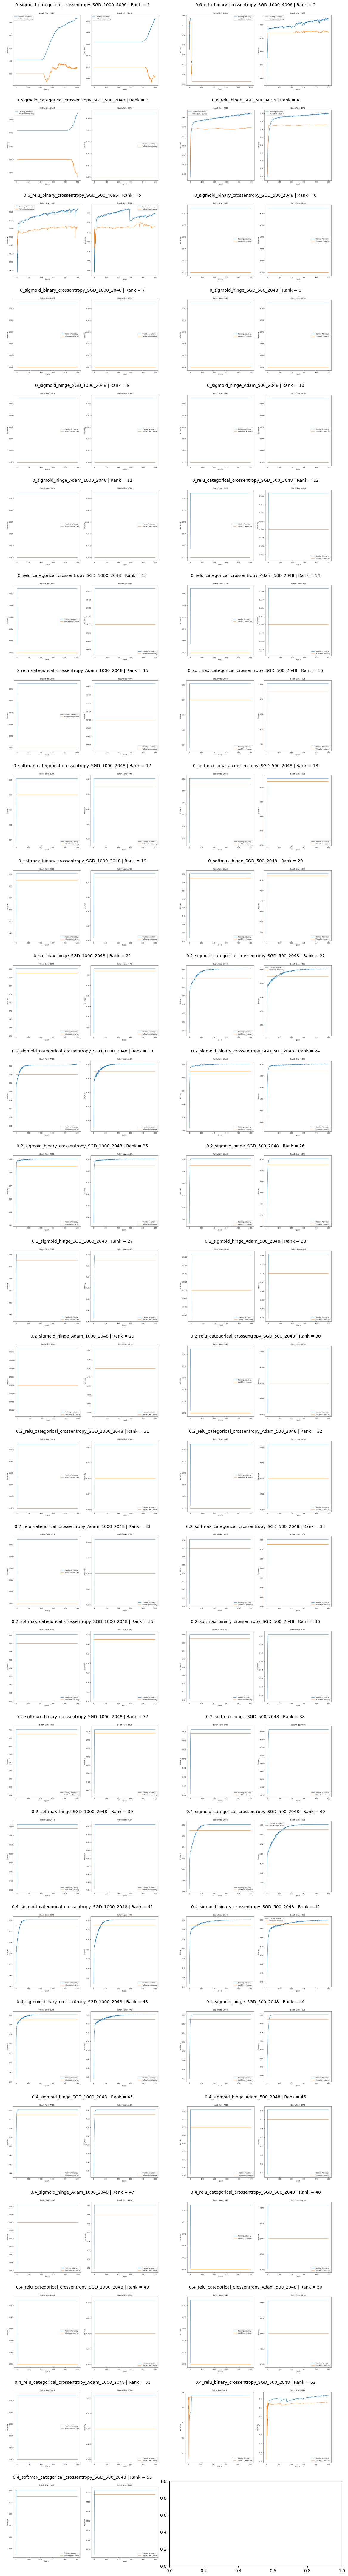

In [21]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
#     ax.imshow(img)

    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}related_work_maia_stiber_top_n_model_train_val_accuracies.png')
plt.show()

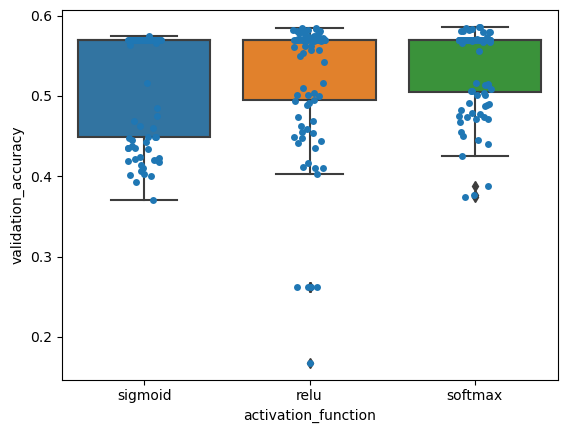

In [23]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

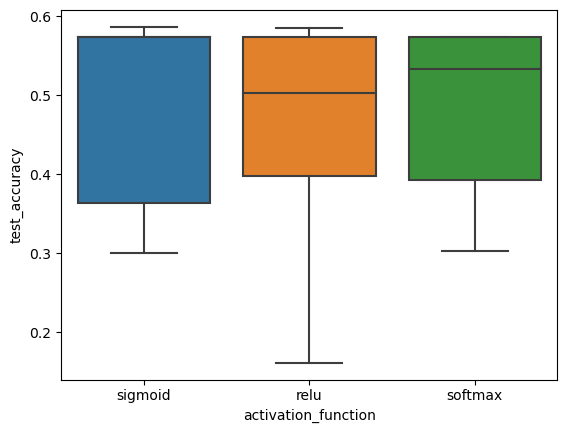

In [24]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()